# OnlineFraud Veri Setinin Analizinin yapılması


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option("display.precision", 2)
frac = 0.000002

In [2]:
dataset = pd.read_csv('./Datasets/onlinefraud.csv');

## Özniteliklerin incelenmesi

In [4]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

***step***: 1 adımın 1 saate eşit olduğu bir zaman birimini temsil eder.

***type***: İşlemin tipi

***amount***: İşlemin miktarı

***nameOrig***: Müşternin işleme başlaması

***oldbalanceOrg***: İşlemden önce bakiye

***newbalanceOrig***: İşlemden sonra bakiye

***nameDest***: İşlemin alıcısı

***oldbalanceDest***: İşlemden önce alıcının ilk bakiyesi

***newbalanceDest***: İşlemden sonra alıcının ilk bakiyesi

***isFraud***: Sahtecilik mi değil mi

**isFlaggedFraud**: -

## Veri setinin içeriğini kontrol ediyoruz

In [4]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['isFraud'] == 1].shape[0]))
print("FraudFlagged İşlem Sayısı: {}".format(dataset[dataset['isFlaggedFraud'] == 1].shape[0]))

Satır Sayısı: 6362620
Öznitelik Syısı: 11
Fraud İşlem Sayısı: 8213
FraudFlagged İşlem Sayısı: 16


In [5]:
dataset.sample(frac=frac)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5798956,401,CASH_OUT,148347.44,C127815018,4.35e+03,0.00e+00,C2080524248,2.46e+05,3.94e+05,0,0
3373641,254,CASH_IN,545759.59,C306925061,7.08e+06,7.63e+06,C2030264846,1.55e+06,1.01e+06,0,0
3006917,232,CASH_IN,88332.93,C151362907,9.37e+06,9.46e+06,C2088695231,1.43e+05,5.50e+04,0,0
3354634,254,CASH_IN,34828.35,C83340288,4.22e+04,7.70e+04,C680614956,0.00e+00,0.00e+00,0,0
3838705,282,PAYMENT,13762.12,C49439450,0.00e+00,0.00e+00,M22131423,0.00e+00,0.00e+00,0,0
3451815,257,CASH_IN,28193.51,C1445370610,2.89e+06,2.92e+06,C975540597,2.79e+05,2.51e+05,0,0
4542402,326,CASH_IN,46975.22,C1896171425,6.27e+06,6.31e+06,C1627636232,3.07e+05,2.60e+05,0,0
6265767,614,CASH_OUT,51650.09,C1386781199,3.07e+05,2.55e+05,C324061061,0.00e+00,5.17e+04,0,0
6063746,503,PAYMENT,2538.97,C2018984654,4.95e+04,4.70e+04,M1550769221,0.00e+00,0.00e+00,0,0
4688381,331,CASH_OUT,34963.17,C1796708151,0.00e+00,0.00e+00,C149926751,8.20e+05,9.08e+05,0,0


In [6]:
dataset.loc[:,"type":"newbalanceOrig"].sample(frac=frac)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig
5132898,CASH_IN,271354.07,C1271206912,1.26e+06,1.53e+06
5793448,PAYMENT,7271.54,C272275897,0.00e+00,0.00e+00
1348718,PAYMENT,29050.54,C176137139,1.10e+04,0.00e+00
2748374,TRANSFER,11932.17,C1054892250,0.00e+00,0.00e+00
5244824,CASH_OUT,55322.77,C1130412002,0.00e+00,0.00e+00
1419347,CASH_IN,73617.33,C1170131199,5.08e+03,7.87e+04
3756099,CASH_IN,305297.19,C414253880,3.29e+04,3.38e+05
2301297,CASH_OUT,682.13,C292624320,1.86e+05,1.85e+05
2861200,PAYMENT,6540.66,C42874328,2.11e+04,1.46e+04
1885825,PAYMENT,2765.93,C1220244218,0.00e+00,0.00e+00


Verilerin sütunlara göre kaç adet non-null veri içerdiği ve veri tipinin gösterimi yapılmıştır.

In [7]:
dataset.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Veri setinin istatiksel bilgilerinin gösterilmiştir (count mean std vb)

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6.36e+06,2.43e+02,1.42e+02,1.0,156.00,239.00,3.35e+02,7.43e+02
amount,6.36e+06,1.80e+05,6.04e+05,0.0,13389.57,74871.94,2.09e+05,9.24e+07
oldbalanceOrg,6.36e+06,8.34e+05,2.89e+06,0.0,0.00,14208.00,1.07e+05,5.96e+07
newbalanceOrig,6.36e+06,8.55e+05,2.92e+06,0.0,0.00,0.00,1.44e+05,4.96e+07
oldbalanceDest,6.36e+06,1.10e+06,3.40e+06,0.0,0.00,132705.66,9.43e+05,3.56e+08
newbalanceDest,6.36e+06,1.22e+06,3.67e+06,0.0,0.00,214661.44,1.11e+06,3.56e+08
isFraud,6.36e+06,1.29e-03,3.59e-02,0.0,0.00,0.00,0.00e+00,1.00e+00
isFlaggedFraud,6.36e+06,2.51e-06,1.59e-03,0.0,0.00,0.00,0.00e+00,1.00e+00


Kategorik Değişkenlerin de incelenmesi görülmüştür.

In [9]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.4,142.33,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.9,603858.23,0.0,13389.57,74871.94,208721.48,92445516.64
nameOrig,6362620,6353307,C1902386530,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.1,2888242.67,0.0,0.0,14208.0,107315.18,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.67,2924048.5,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.67,3399180.11,0.0,0.0,132705.66,943036.71,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.4,3674128.94,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.0,0.04,0.0,0.0,0.0,0.0,1.0


## Kategorik Özniteliklerin incelenmesi

nameOrig ve nameDest değişkenlerinin,yukarıda gördüğümüz üzer benzersiz değerleri çok fazla olduğu için incelenmemiştir.

In [10]:
categoricalColumns = dataset.select_dtypes(include = ["object"])


In [11]:
categoricalColumns.sample(frac=frac)

,type,nameOrig,nameDest
2237751,PAYMENT,C1596944500,M1860205251
1456343,CASH_OUT,C1654655103,C956179031
5994728,CASH_OUT,C1599256287,C1406296898
5785508,CASH_IN,C1331804192,C1250196663
1415839,TRANSFER,C660919574,C642567132
1341376,TRANSFER,C1846778278,C1727128330
433010,PAYMENT,C1452635435,M1926361201
2029893,CASH_OUT,C830771520,C711033364
5109742,CASH_OUT,C1711771731,C996744983
4578661,PAYMENT,C953463501,M2045100600


In [12]:
categoricalColumns["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
categoricalColumns["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

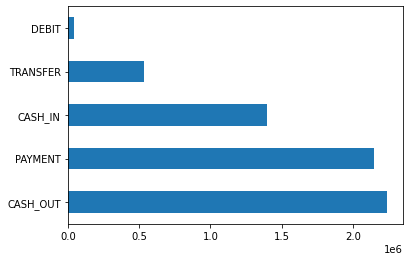

In [14]:
categoricalColumns["type"].value_counts().plot.barh();

In [15]:
type = dataset["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(dataset, values=quantity, names=transactions, hole = 0.5, title="İşlemlerin Dağılımı")
figure.show()

## Veri setinin özniteliklerinin arasındaki ilişkinin incelenmesi

In [16]:
dataset.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00e+00,2.24e-02,-1.01e-02,-1.03e-02,2.77e-02,2.59e-02,3.16e-02,3.28e-03
amount,2.24e-02,1.00e+00,-2.76e-03,-7.86e-03,2.94e-01,4.59e-01,7.67e-02,1.23e-02
oldbalanceOrg,-1.01e-02,-2.76e-03,1.00e+00,9.99e-01,6.62e-02,4.20e-02,1.02e-02,3.83e-03
newbalanceOrig,-1.03e-02,-7.86e-03,9.99e-01,1.00e+00,6.78e-02,4.18e-02,-8.15e-03,3.78e-03
oldbalanceDest,2.77e-02,2.94e-01,6.62e-02,6.78e-02,1.00e+00,9.77e-01,-5.89e-03,-5.13e-04
newbalanceDest,2.59e-02,4.59e-01,4.20e-02,4.18e-02,9.77e-01,1.00e+00,5.35e-04,-5.29e-04
isFraud,3.16e-02,7.67e-02,1.02e-02,-8.15e-03,-5.89e-03,5.35e-04,1.00e+00,4.41e-02
isFlaggedFraud,3.28e-03,1.23e-02,3.83e-03,3.78e-03,-5.13e-04,-5.29e-04,4.41e-02,1.00e+00


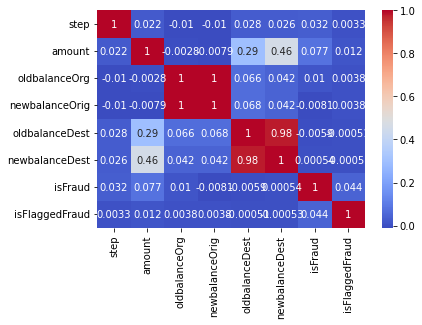

In [17]:
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

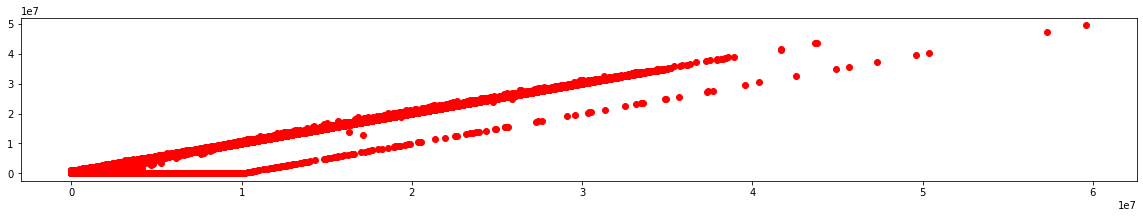

In [18]:
plt.figure(figsize=(20,3))
plt.scatter(dataset['oldbalanceOrg'], dataset['newbalanceOrig'], c='red');

hue olarak amountı eklediğimizde ortaya çıkan grafik gösterilmiştir.

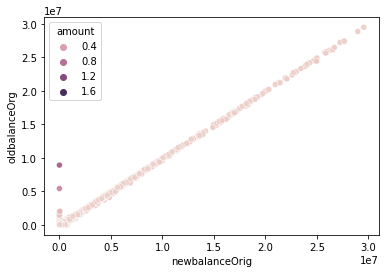

In [19]:
sns.scatterplot(x="newbalanceOrig", y="oldbalanceOrg", hue="amount", data=dataset.sample(frac=0.001));

Sayısal Değişkenlerin Dağılımı gösterilmiştir.

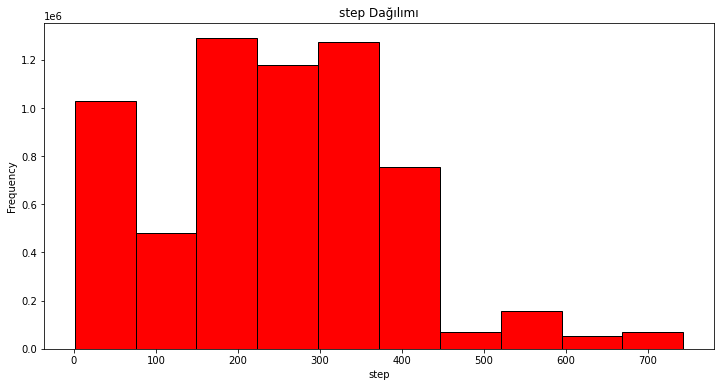

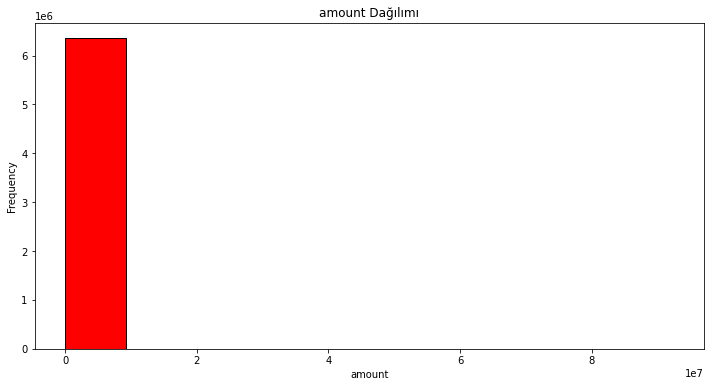

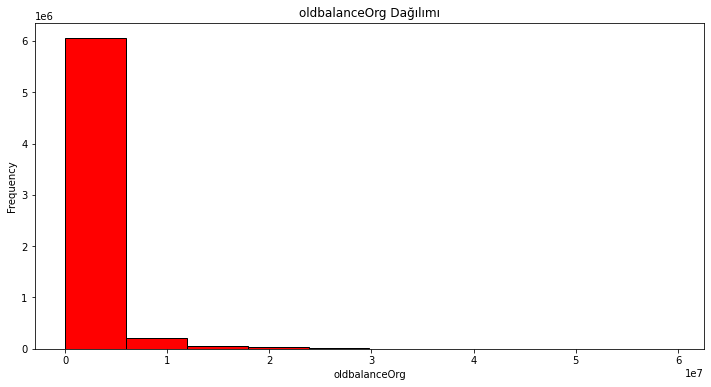

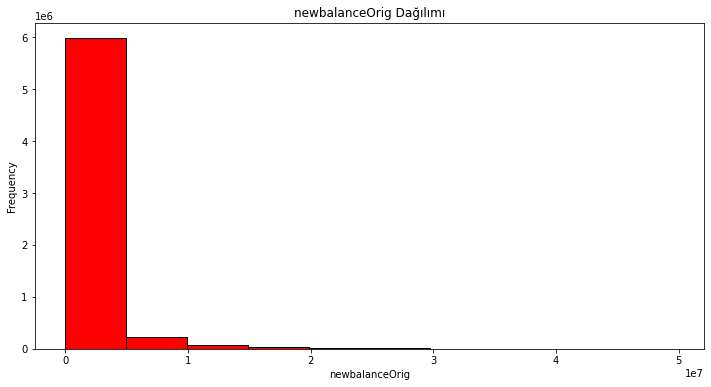

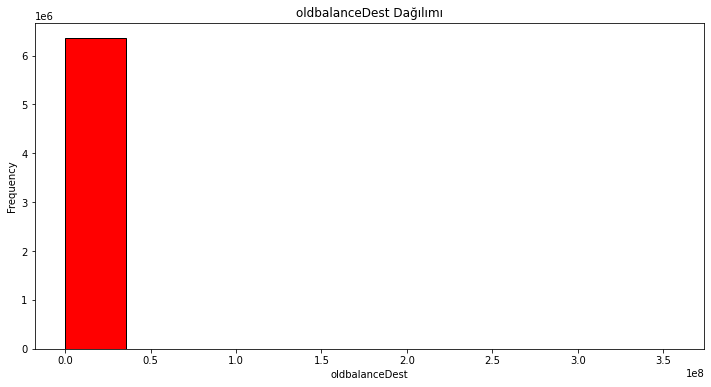

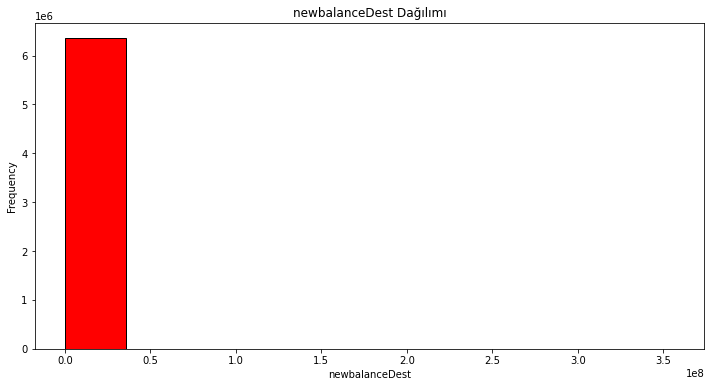

In [20]:
columns=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for column in columns:
    plt.xlabel(column)
    dataset[column].plot(kind='hist', bins=10, figsize=(12,6), facecolor='red',edgecolor='black')
    plt.title(f"{column} Dağılımı")
    plt.show()

# **Özellik Ölçekleme**

Aralarında değer farkı çok yüksek olan özellikleri ölçekleyerek, aralarındaki sayısal farkı azaltmış olduk.

In [21]:
from sklearn import preprocessing

MinMaxScaler ile normalizasyon yapılmıştır.

Xn = (X - Xmin) / (Xmax - Xmin)

In [22]:
data = dataset.loc[:, ["amount", "oldbalanceOrg"]].values
data

array([[9.83964000e+03, 1.70136000e+05],
       [1.86428000e+03, 2.12490000e+04],
       [1.81000000e+02, 1.81000000e+02],
       ...,
       [6.31140928e+06, 6.31140928e+06],
       [8.50002520e+05, 8.50002520e+05],
       [8.50002520e+05, 8.50002520e+05]])

In [23]:
MinMaxScaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
scaledData = MinMaxScaler.fit_transform(data)
scaledData

array([[1.06437179e-04, 2.85534757e-03],
       [2.01662565e-05, 3.56616357e-04],
       [1.95790998e-06, 3.03767521e-06],
       ...,
       [6.82716643e-02, 1.05922716e-01],
       [9.19463216e-03, 1.42653679e-02],
       [9.19463216e-03, 1.42653679e-02]])

StandardScalser ile Standardazasyon yapılmıştır.

X' = (X - mean) / (Standard Devation)

In [24]:
Standardisation = preprocessing.StandardScaler()
scaledData = MinMaxScaler.fit_transform(data)
scaledData

array([[1.06437179e-04, 2.85534757e-03],
       [2.01662565e-05, 3.56616357e-04],
       [1.95790998e-06, 3.03767521e-06],
       ...,
       [6.82716643e-02, 1.05922716e-01],
       [9.19463216e-03, 1.42653679e-02],
       [9.19463216e-03, 1.42653679e-02]])

In [25]:
numericColumns = dataset.loc[:, ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
norm = preprocessing.MinMaxScaler().fit(numericColumns)
datasetNorm = norm.transform(numericColumns)
datasetNorm

array([[0.00000000e+00, 1.06437179e-04, 2.85534757e-03, 3.23275647e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01662565e-05, 3.56616357e-04, 3.90938877e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.82716643e-02, 1.05922716e-01, 0.00000000e+00,
        1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        1.82859791e-02, 2.06640365e-02]])

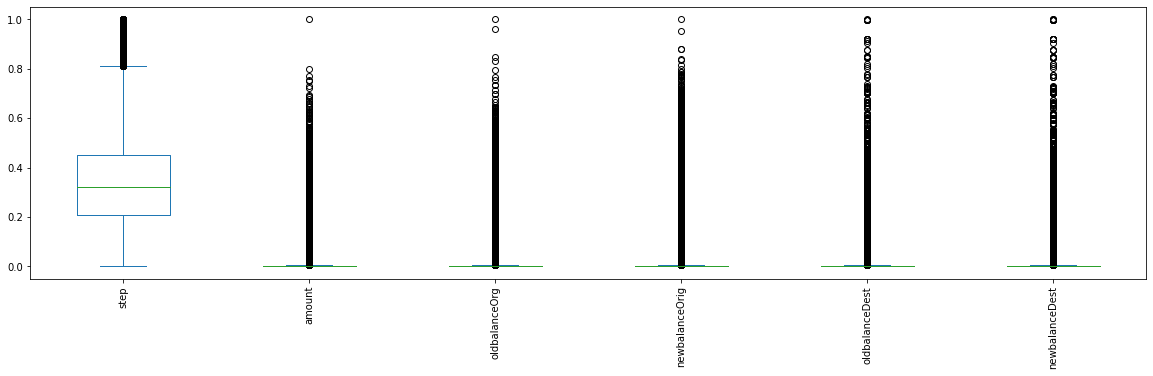

In [26]:
pd.DataFrame(datasetNorm, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);

In [27]:
numericColumns = dataset.loc[:, ["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
norm = preprocessing.StandardScaler().fit(numericColumns)
datasetStd = norm.transform(numericColumns)
datasetStd

array([[-1.70304158e+00, -2.81559923e-01, -2.29810037e-01,
        -2.37621696e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.94767262e-01, -2.81359380e-01,
        -2.85812295e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.97554804e-01, -2.88653782e-01,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       ...,
       [ 3.51012348e+00,  1.01539526e+01,  1.89649113e+00,
        -2.92441707e-01, -3.03665258e-01,  1.40302700e+00],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01,  1.59138312e+00,  1.66981230e+00]])

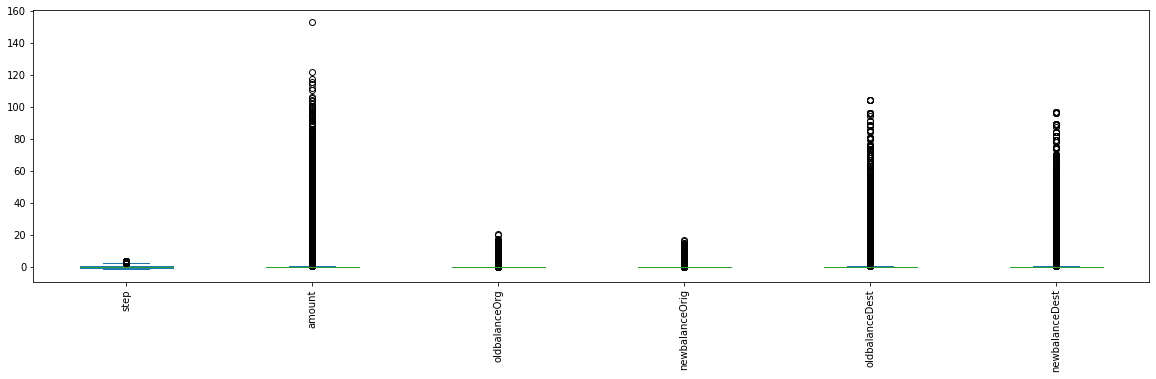

In [28]:
pd.DataFrame(datasetStd, columns=numericColumns.columns).plot.box(figsize=(20,5), rot=90);